In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loss_values = []
val_loss_values = []
val_auc_list = []
train_auc_list = []
train_acc_list = []
val_acc_list = []
PATH = './results/ABIDE1_ASD_CON_only_cc/edge20/'
FILE = 'graphsage_none_lr1e-4_epoch300_batch800_decay0.0001_layer2_10fold_dim128_fc32_fold'
for i in range(1,11):
    print(i)
    with open(f'{PATH}{FILE}{i}_seed0_loss_array.txt') as f:
        file = [[float(j.lstrip('[').rstrip(']\n')) for j in line.split(', ')] for line in f.readlines()]
        for i in range(6):
            if i == 0: 
                loss_values.append(file[i])
            elif i == 1: 
                val_loss_values.append(file[i])
            elif i == 2: 
                val_auc_list.append(file[i])
            elif i == 3: 
                train_auc_list.append(file[i])
            elif i == 4: 
                train_acc_list.append(file[i])
            else: 
                val_acc_list.append(file[i])
        #print(x)  

1
2
3
4
5
6
7
8
9
10


In [ ]:
loss_values = loss_values[:][:200]
val_loss_values = val_loss_values[:][:200]
val_auc_list = val_auc_list[:][:200]
train_auc_list = train_auc_list[:][:200]
train_acc_list = train_acc_list[:][:200]
val_acc_list = val_acc_list[:][:200]

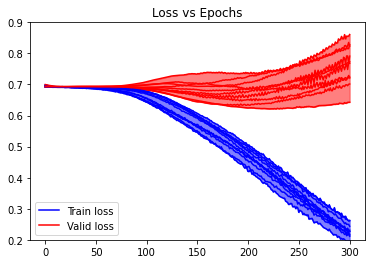

In [35]:
# ASD + NC loss plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N=300
loss_values_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': loss_values[0],
                   'y_2': loss_values[1],
                   'y_3': loss_values[2],
                   'y_4': loss_values[3],
                   'y_5': loss_values[4],
                   'y_6': loss_values[5],
                   'y_7': loss_values[6],
                   'y_8': loss_values[7],
                   'y_9': loss_values[8],
                   'y_10': loss_values[9]})
loss_values_df2 =  pd.DataFrame({'y_1': loss_values[0],
                   'y_2': loss_values[1],
                   'y_3': loss_values[2],
                   'y_4': loss_values[3],
                   'y_5': loss_values[4],
                   'y_6': loss_values[5],
                   'y_7': loss_values[6],
                   'y_8': loss_values[7],
                   'y_9': loss_values[8],
                   'y_10': loss_values[9]})

loss_values_df['y_max'] = loss_values_df2.max(axis = 1, numeric_only = True)
loss_values_df['y_min'] = loss_values_df2.min(axis = 1, numeric_only = True)

val_loss_values_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': val_loss_values[0],
                   'y_2': val_loss_values[1],
                   'y_3': val_loss_values[2],
                   'y_4': val_loss_values[3],
                   'y_5': val_loss_values[4],
                   'y_6': val_loss_values[5],
                   'y_7': val_loss_values[6],
                   'y_8': val_loss_values[7],
                   'y_9': val_loss_values[8],
                   'y_10': val_loss_values[9]})
val_loss_values_df2 =  pd.DataFrame({'y_1': val_loss_values[0],
                   'y_2': val_loss_values[1],
                   'y_3': val_loss_values[2],
                   'y_4': val_loss_values[3],
                   'y_5': val_loss_values[4],
                   'y_6': val_loss_values[5],
                   'y_7': val_loss_values[6],
                   'y_8': val_loss_values[7],
                   'y_9': val_loss_values[8],
                   'y_10': val_loss_values[9]})

val_loss_values_df['y_max'] = val_loss_values_df2.max(axis = 1, numeric_only = True)
val_loss_values_df['y_min'] = val_loss_values_df2.min(axis = 1, numeric_only = True)

fig, ax = plt.subplots()
ax.plot(loss_values_df['x'], loss_values_df[f'y_1'], color = 'blue',label='Train loss')
ax.plot(val_loss_values_df['x'], val_loss_values_df[f'y_1'], color = 'red',label='Valid loss')
for i in range(2,11):
    ax.plot(loss_values_df['x'], loss_values_df[f'y_{i}'], color = 'blue')
    ax.plot(val_loss_values_df['x'], val_loss_values_df[f'y_{i}'], color = 'red')
#ax.plot(loss_values_df['x'], loss_values_df['y_1'], color = 'blue',label='Train loss')
#ax.plot(loss_values_df['x'], loss_values_df['y_2'], color = 'blue')
#ax.plot(loss_values_df['x'], loss_values_df['y_3'], color = 'blue')
#ax.plot(loss_values_df['x'], loss_values_df['y_4'], color = 'blue')
#ax.plot(loss_values_df['x'], loss_values_df['y_5'], color = 'blue')
#ax.plot(val_loss_values_df['x'], val_loss_values_df['y_1'], color = 'red',label='Valid loss')
#ax.plot(val_loss_values_df['x'], val_loss_values_df['y_2'], color = 'red')
#ax.plot(val_loss_values_df['x'], val_loss_values_df['y_3'], color = 'red')
#ax.plot(val_loss_values_df['x'], val_loss_values_df['y_4'], color = 'red')
#ax.plot(val_loss_values_df['x'], val_loss_values_df['y_5'], color = 'red')
plt.title('Loss vs Epochs')
ax.legend(loc='lower left')
plt.ylim([0.2, 0.9])
ax.fill_between(loss_values_df['x'], loss_values_df['y_max'], loss_values_df['y_min'], color = 'blue', alpha = 0.5)
ax.fill_between(val_loss_values_df['x'], val_loss_values_df['y_max'], val_loss_values_df['y_min'], color = 'red', alpha = 0.5)
plt.savefig(f'{PATH}{FILE}_loss_vs_Epochs.png')
plt.show()

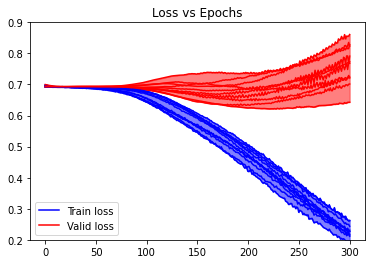

In [ ]:
# ASD vs ASD+ADHD loss plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N=300
loss_values_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': loss_values[0],
                   'y_2': loss_values[1],
                   'y_3': loss_values[2],
                   'y_4': loss_values[3],
                   'y_5': loss_values[4]})
loss_values_df2 =  pd.DataFrame({'y_1': loss_values[0],
                   'y_2': loss_values[1],
                   'y_3': loss_values[2],
                   'y_4': loss_values[3],
                   'y_5': loss_values[4]})

loss_values_df['y_max'] = loss_values_df2.max(axis = 1, numeric_only = True)
loss_values_df['y_min'] = loss_values_df2.min(axis = 1, numeric_only = True)

val_loss_values_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': val_loss_values[0],
                   'y_2': val_loss_values[1],
                   'y_3': val_loss_values[2],
                   'y_4': val_loss_values[3],
                   'y_5': val_loss_values[4]})
val_loss_values_df2 =  pd.DataFrame({'y_1': val_loss_values[0],
                   'y_2': val_loss_values[1],
                   'y_3': val_loss_values[2],
                   'y_4': val_loss_values[3],
                   'y_5': val_loss_values[4]})

val_loss_values_df['y_max'] = val_loss_values_df2.max(axis = 1, numeric_only = True)
val_loss_values_df['y_min'] = val_loss_values_df2.min(axis = 1, numeric_only = True)

fig, ax = plt.subplots()
ax.plot(loss_values_df['x'], loss_values_df[f'y_1'], color = 'blue',label='Train loss')
ax.plot(val_loss_values_df['x'], val_loss_values_df[f'y_1'], color = 'red',label='Valid loss')
for i in range(2,6):
    ax.plot(loss_values_df['x'], loss_values_df[f'y_{i}'], color = 'blue')
    ax.plot(val_loss_values_df['x'], val_loss_values_df[f'y_{i}'], color = 'red')

plt.title('Loss vs Epochs')
ax.legend(loc='lower left')
plt.ylim([0.2, 0.9])
ax.fill_between(loss_values_df['x'], loss_values_df['y_max'], loss_values_df['y_min'], color = 'blue', alpha = 0.5)
ax.fill_between(val_loss_values_df['x'], val_loss_values_df['y_max'], val_loss_values_df['y_min'], color = 'red', alpha = 0.5)
plt.savefig(f'{PATH}{FILE}_loss_vs_Epochs.png')
plt.show()

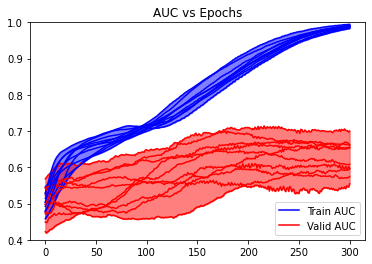

In [36]:
# ASD vs NC AUC plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 300
train_auc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': train_auc_list[0],
                   'y_2': train_auc_list[1],
                   'y_3': train_auc_list[2],
                   'y_4': train_auc_list[3],
                   'y_5': train_auc_list[4],
                   'y_6': train_auc_list[5],
                   'y_7': train_auc_list[6],
                   'y_8': train_auc_list[7],
                   'y_9': train_auc_list[8],
                   'y_10': train_auc_list[9]})
train_auc_list_df2 =  pd.DataFrame({'y_1': train_auc_list[0],
                   'y_2': train_auc_list[1],
                   'y_3': train_auc_list[2],
                   'y_4': train_auc_list[3],
                   'y_5': train_auc_list[4],
                   'y_6': train_auc_list[5],
                   'y_7': train_auc_list[6],
                   'y_8': train_auc_list[7],
                   'y_9': train_auc_list[8],
                   'y_10': train_auc_list[9]})

train_auc_list_df['y_max'] = train_auc_list_df2.max(axis = 1, numeric_only = True)
train_auc_list_df['y_min'] = train_auc_list_df2.min(axis = 1, numeric_only = True)

val_auc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': val_auc_list[0],
                   'y_2': val_auc_list[1],
                   'y_3': val_auc_list[2],
                   'y_4': val_auc_list[3],
                   'y_5': val_auc_list[4],
                   'y_6': val_auc_list[5],
                   'y_7': val_auc_list[6],
                   'y_8': val_auc_list[7],
                   'y_9': val_auc_list[8],
                   'y_10': val_auc_list[9]})
val_auc_list_df2 =  pd.DataFrame({'y_1': val_auc_list[0],
                   'y_2': val_auc_list[1],
                   'y_3': val_auc_list[2],
                   'y_4': val_auc_list[3],
                   'y_5': val_auc_list[4],
                   'y_6': val_auc_list[5],
                   'y_7': val_auc_list[6],
                   'y_8': val_auc_list[7],
                   'y_9': val_auc_list[8],
                   'y_10': val_auc_list[9]})

val_auc_list_df['y_max'] = val_auc_list_df2.max(axis = 1, numeric_only = True)
val_auc_list_df['y_min'] = val_auc_list_df2.min(axis = 1, numeric_only = True)

fig, ax = plt.subplots()

ax.plot(train_auc_list_df['x'], train_auc_list_df['y_1'], color = 'blue', label = 'Train AUC')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_2'], color = 'blue')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_3'], color = 'blue')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_4'], color = 'blue')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_5'], color = 'blue')
ax.plot(val_auc_list_df['x'], val_auc_list_df['y_1'], color = 'red', label = 'Valid AUC')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_2'], color = 'red')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_3'], color = 'red')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_4'], color = 'red')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_5'], color = 'red')

for i in range(2,11):
    ax.plot(train_auc_list_df['x'], train_auc_list_df[f'y_{i}'], color = 'blue')
    ax.plot(val_auc_list_df['x'], val_auc_list_df[f'y_{i}'], color = 'red')

plt.title('AUC vs Epochs')
ax.legend(loc='lower right')
plt.ylim([0.4, 1])
ax.fill_between(train_auc_list_df['x'], train_auc_list_df['y_max'], train_auc_list_df['y_min'], color = 'blue', alpha = 0.5)
ax.fill_between(val_auc_list_df['x'], val_auc_list_df['y_max'], val_auc_list_df['y_min'], color = 'red', alpha = 0.5)
plt.savefig(f'{PATH}{FILE}_AUC_vs_Epochs.png')

plt.show()

In [ ]:
# ASD vs ASD+ADHD AUC plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 300
train_auc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': train_auc_list[0],
                   'y_2': train_auc_list[1],
                   'y_3': train_auc_list[2],
                   'y_4': train_auc_list[3],
                   'y_5': train_auc_list[4]})
train_auc_list_df2 =  pd.DataFrame({'y_1': train_auc_list[0],
                   'y_2': train_auc_list[1],
                   'y_3': train_auc_list[2],
                   'y_4': train_auc_list[3],
                   'y_5': train_auc_list[4]})

train_auc_list_df['y_max'] = train_auc_list_df2.max(axis = 1, numeric_only = True)
train_auc_list_df['y_min'] = train_auc_list_df2.min(axis = 1, numeric_only = True)

val_auc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': val_auc_list[0],
                   'y_2': val_auc_list[1],
                   'y_3': val_auc_list[2],
                   'y_4': val_auc_list[3],
                   'y_5': val_auc_list[4]})
val_auc_list_df2 =  pd.DataFrame({'y_1': val_auc_list[0],
                   'y_2': val_auc_list[1],
                   'y_3': val_auc_list[2],
                   'y_4': val_auc_list[3],
                   'y_5': val_auc_list[4]})

val_auc_list_df['y_max'] = val_auc_list_df2.max(axis = 1, numeric_only = True)
val_auc_list_df['y_min'] = val_auc_list_df2.min(axis = 1, numeric_only = True)

fig, ax = plt.subplots()

ax.plot(train_auc_list_df['x'], train_auc_list_df['y_1'], color = 'blue', label = 'Train AUC')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_2'], color = 'blue')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_3'], color = 'blue')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_4'], color = 'blue')
# ax.plot(train_auc_list_df['x'], train_auc_list_df['y_5'], color = 'blue')
ax.plot(val_auc_list_df['x'], val_auc_list_df['y_1'], color = 'red', label = 'Valid AUC')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_2'], color = 'red')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_3'], color = 'red')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_4'], color = 'red')
# ax.plot(val_auc_list_df['x'], val_auc_list_df['y_5'], color = 'red')

for i in range(2,6):
    ax.plot(train_auc_list_df['x'], train_auc_list_df[f'y_{i}'], color = 'blue')
    ax.plot(val_auc_list_df['x'], val_auc_list_df[f'y_{i}'], color = 'red')

plt.title('AUC vs Epochs')
ax.legend(loc='lower right')
plt.ylim([0.4, 1])
ax.fill_between(train_auc_list_df['x'], train_auc_list_df['y_max'], train_auc_list_df['y_min'], color = 'blue', alpha = 0.5)
ax.fill_between(val_auc_list_df['x'], val_auc_list_df['y_max'], val_auc_list_df['y_min'], color = 'red', alpha = 0.5)
plt.savefig(f'{PATH}{FILE}_AUC_vs_Epochs.png')

plt.show()

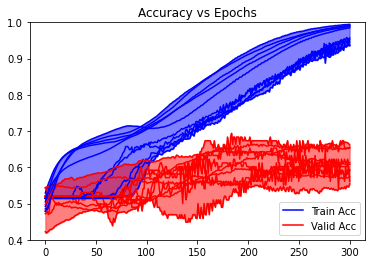

In [37]:
# ASD vs NC Accuracy plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 300
train_acc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': train_acc_list[0],
                   'y_2': train_acc_list[1],
                   'y_3': train_acc_list[2],
                   'y_4': train_acc_list[3],
                   'y_5': train_acc_list[4],
                   'y_6': train_auc_list[5],
                   'y_7': train_auc_list[6],
                   'y_8': train_auc_list[7],
                   'y_9': train_auc_list[8],
                   'y_10': train_auc_list[9]})
train_acc_list_df2 =  pd.DataFrame({'y_1': train_acc_list[0],
                   'y_2': train_acc_list[1],
                   'y_3': train_acc_list[2],
                   'y_4': train_acc_list[3],
                   'y_5': train_acc_list[4],
                   'y_6': train_auc_list[5],
                   'y_7': train_auc_list[6],
                   'y_8': train_auc_list[7],
                   'y_9': train_auc_list[8],
                   'y_10': train_auc_list[9]})

train_acc_list_df['y_max'] = train_acc_list_df2.max(axis = 1, numeric_only = True)
train_acc_list_df['y_min'] = train_acc_list_df2.min(axis = 1, numeric_only = True)

val_acc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': val_acc_list[0],
                   'y_2': val_acc_list[1],
                   'y_3': val_acc_list[2],
                   'y_4': val_acc_list[3],
                   'y_5': val_acc_list[4],
                   'y_6': val_auc_list[5],
                   'y_7': val_auc_list[6],
                   'y_8': val_auc_list[7],
                   'y_9': val_auc_list[8],
                   'y_10': val_auc_list[9]})
val_acc_list_df2 =  pd.DataFrame({'y_1': val_acc_list[0],
                   'y_2': val_acc_list[1],
                   'y_3': val_acc_list[2],
                   'y_4': val_acc_list[3],
                   'y_5': val_acc_list[4],
                   'y_6': val_auc_list[5],
                   'y_7': val_auc_list[6],
                   'y_8': val_auc_list[7],
                   'y_9': val_auc_list[8],
                   'y_10': val_auc_list[9]})

val_acc_list_df['y_max'] = val_acc_list_df2.max(axis = 1, numeric_only = True)
val_acc_list_df['y_min'] = val_acc_list_df2.min(axis = 1, numeric_only = True)

fig, ax = plt.subplots()

ax.plot(train_acc_list_df['x'], train_acc_list_df['y_1'], color = 'blue', label = 'Train Acc')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_2'], color = 'blue')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_3'], color = 'blue')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_4'], color = 'blue')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_5'], color = 'blue')
ax.plot(val_acc_list_df['x'], val_acc_list_df['y_1'], color = 'red', label = 'Valid Acc')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_2'], color = 'red')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_3'], color = 'red')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_4'], color = 'red')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_5'], color = 'red')

for i in range(2,11):
    ax.plot(train_acc_list_df['x'], train_acc_list_df[f'y_{i}'], color = 'blue')
    ax.plot(val_acc_list_df['x'], val_acc_list_df[f'y_{i}'], color = 'red')

plt.title('Accuracy vs Epochs')
ax.legend(loc='lower right')
plt.ylim([0.4, 1])
ax.fill_between(train_acc_list_df['x'], train_acc_list_df['y_max'], train_acc_list_df['y_min'], color = 'blue', alpha = 0.5)
ax.fill_between(val_acc_list_df['x'], val_acc_list_df['y_max'], val_acc_list_df['y_min'], color = 'red', alpha = 0.5)
plt.savefig(f'{PATH}{FILE}_Accuracy_vs_Epochs.png')

plt.show()

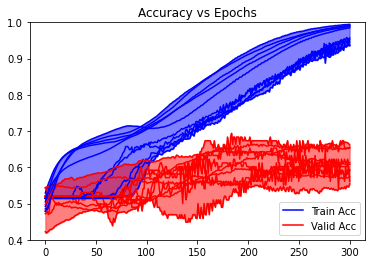

In [ ]:
# ASD vs ASD+ADHD Accuracy plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 300
train_acc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': train_acc_list[0],
                   'y_2': train_acc_list[1],
                   'y_3': train_acc_list[2],
                   'y_4': train_acc_list[3],
                   'y_5': train_acc_list[4]})
train_acc_list_df2 =  pd.DataFrame({'y_1': train_acc_list[0],
                   'y_2': train_acc_list[1],
                   'y_3': train_acc_list[2],
                   'y_4': train_acc_list[3],
                   'y_5': train_acc_list[4]})

train_acc_list_df['y_max'] = train_acc_list_df2.max(axis = 1, numeric_only = True)
train_acc_list_df['y_min'] = train_acc_list_df2.min(axis = 1, numeric_only = True)

val_acc_list_df = pd.DataFrame({'x': np.linspace(0, N, N),
                   'y_1': val_acc_list[0],
                   'y_2': val_acc_list[1],
                   'y_3': val_acc_list[2],
                   'y_4': val_acc_list[3],
                   'y_5': val_acc_list[4]})
val_acc_list_df2 =  pd.DataFrame({'y_1': val_acc_list[0],
                   'y_2': val_acc_list[1],
                   'y_3': val_acc_list[2],
                   'y_4': val_acc_list[3],
                   'y_5': val_acc_list[4]})

val_acc_list_df['y_max'] = val_acc_list_df2.max(axis = 1, numeric_only = True)
val_acc_list_df['y_min'] = val_acc_list_df2.min(axis = 1, numeric_only = True)

fig, ax = plt.subplots()

ax.plot(train_acc_list_df['x'], train_acc_list_df['y_1'], color = 'blue', label = 'Train Acc')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_2'], color = 'blue')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_3'], color = 'blue')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_4'], color = 'blue')
# ax.plot(train_acc_list_df['x'], train_acc_list_df['y_5'], color = 'blue')
ax.plot(val_acc_list_df['x'], val_acc_list_df['y_1'], color = 'red', label = 'Valid Acc')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_2'], color = 'red')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_3'], color = 'red')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_4'], color = 'red')
# ax.plot(val_acc_list_df['x'], val_acc_list_df['y_5'], color = 'red')

for i in range(2,6):
    ax.plot(train_acc_list_df['x'], train_acc_list_df[f'y_{i}'], color = 'blue')
    ax.plot(val_acc_list_df['x'], val_acc_list_df[f'y_{i}'], color = 'red')

plt.title('Accuracy vs Epochs')
ax.legend(loc='lower right')
plt.ylim([0.4, 1])
ax.fill_between(train_acc_list_df['x'], train_acc_list_df['y_max'], train_acc_list_df['y_min'], color = 'blue', alpha = 0.5)
ax.fill_between(val_acc_list_df['x'], val_acc_list_df['y_max'], val_acc_list_df['y_min'], color = 'red', alpha = 0.5)
plt.savefig(f'{PATH}{FILE}_Accuracy_vs_Epochs.png')

plt.show()